In [1]:
import pandas as pd
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


# Explore Data

In [2]:
# Load Data 
train_data = pd.read_csv('./data/train.csv')
train_data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
train_data['label'].value_counts().sort_index().plot.bar()

# Prepare Data for Training

In [5]:
def prepare_x(data):
    imgs = data.loc[:, data.columns!='label']
    # scale pixel value between 0 and 1
    imgs = imgs/255.0
    # reshape data to image format with dimension (28x28x1)
    x = imgs.values.reshape(-1, 28,28,1)
    return x

def prepare_y(data):
    labels = data.label
    # convert labels to one hot encoded vector
    y = to_categorical(labels, num_classes=10)
    return y

In [6]:
train_data = pd.read_csv('./data/train.csv')
train_x = prepare_x(train_data)
train_y = prepare_y(train_data)
print ("Train X shape : " + str(train_x.shape))
print ("Train Y shape : " + str(train_y.shape))

Train X shape : (42000, 28, 28, 1)
Train Y shape : (42000, 10)


# Display Some Images

In [7]:
import matplotlib.pyplot as plt

def showImage(img):
    first_array=(img).reshape([28, 28])
    plt.imshow(first_array)
    plt.gray()
    plt.show()


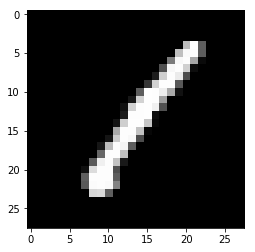

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
showImage(train_x[0])
print(train_y[0])

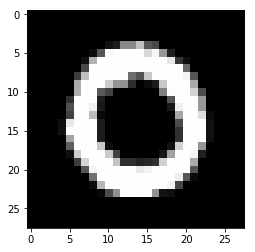

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
showImage(train_x[1])
print(train_y[1])

# Build Models

In [10]:
def get_model1():
    model = Sequential()    
    model.add(Flatten(input_shape = (28,28,1)))    
    model.add(Dense(512, activation = "relu"))    
    model.add(Dropout(0.25))    
    model.add(Dense(256, activation = "relu"))    
    model.add(Dropout(0.25))    
    model.add(Dense(10, activation = "softmax"))    
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])    
    return model

In [11]:
def get_model2():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"]) 
    
    return model

In [51]:
def get_model3():
    model = Sequential()

    model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"]) 
    
    return model

In [13]:
def plot_accuracy(history):    

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
def plot_loss(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Training

## Model1

In [31]:
model1 = get_model1()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model1.fit(x=train_x, y=train_y, batch_size=64, epochs=30, validation_split=0.2, )

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 1s 43us/step - loss: 0.3042 - acc: 0.9051 - val_loss: 0.1939 - val_acc: 0.9460
Epoch 2/30
33600/33600 [==============================] - 1s 38us/step - loss: 0.1392 - acc: 0.9582 - val_loss: 0.1153 - val_acc: 0.9685
Epoch 3/30
33600/33600 [==============================] - 1s 40us/step - loss: 0.1020 - acc: 0.9689 - val_loss: 0.1001 - val_acc: 0.9715
Epoch 4/30
33600/33600 [==============================] - 1s 39us/step - loss: 0.0824 - acc: 0.9756 - val_loss: 0.1079 - val_acc: 0.9724
Epoch 5/30
33600/33600 [==============================] - 1s 40us/step - loss: 0.0703 - acc: 0.9791 - val_loss: 0.0963 - val_acc: 0.9769
Epoch 6/30
33600/33600 [==============================] - 1s 38us/step - loss: 0.0619 - acc: 0.9823 - val_loss: 0.1045 - val_acc: 0.9761
Epoch 7/30
33600/33600 [==============================] - 1s 37us/step - loss: 0.0558 - acc: 0.9838 - val_loss: 0.1128 - val_acc:

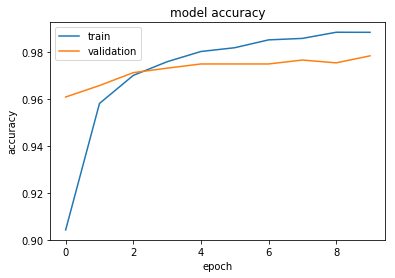

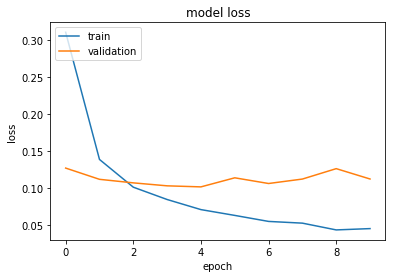

In [16]:
plot_accuracy(history)
plot_loss(history)

## Model 2

In [33]:
model2= get_model2()
history2 = model2.fit(x=train_x, y=train_y, batch_size=64, epochs=30, validation_split=0.2, )

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 4s 126us/step - loss: 0.2356 - acc: 0.9274 - val_loss: 0.0525 - val_acc: 0.9820
Epoch 2/30
33600/33600 [==============================] - 4s 120us/step - loss: 0.0729 - acc: 0.9790 - val_loss: 0.0404 - val_acc: 0.9875
Epoch 3/30
33600/33600 [==============================] - 4s 126us/step - loss: 0.0578 - acc: 0.9827 - val_loss: 0.0438 - val_acc: 0.9865
Epoch 4/30
33600/33600 [==============================] - 4s 122us/step - loss: 0.0472 - acc: 0.9865 - val_loss: 0.0331 - val_acc: 0.9910
Epoch 5/30
33600/33600 [==============================] - 4s 121us/step - loss: 0.0429 - acc: 0.9874 - val_loss: 0.0288 - val_acc: 0.9912
Epoch 6/30
33600/33600 [==============================] - 4s 112us/step - loss: 0.0380 - acc: 0.9889 - val_loss: 0.0349 - val_acc: 0.9915
Epoch 7/30
33600/33600 [==============================] - 4s 110us/step - loss: 0.0370 - acc: 0.9900 - val_loss: 0.0339 - v

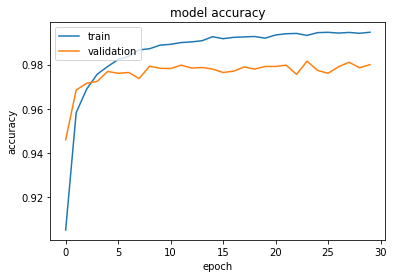

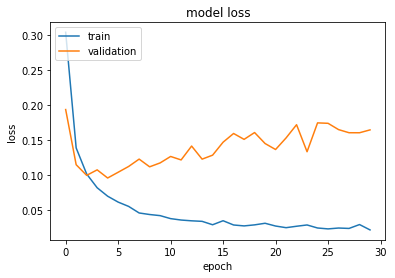

In [34]:
from util import plot_accuracy, plot_loss
plot_accuracy(history)
plot_loss(history)

# Model 3

In [52]:
model3 = get_model3()
history3 = model3.fit(x=train_x, y=train_y, batch_size=64, epochs=30, validation_split=0.2, )

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 7s 200us/step - loss: 0.2851 - acc: 0.9115 - val_loss: 0.0550 - val_acc: 0.9830
Epoch 2/30
33600/33600 [==============================] - 6s 190us/step - loss: 0.0839 - acc: 0.9758 - val_loss: 0.0649 - val_acc: 0.9857
Epoch 3/30
33600/33600 [==============================] - 6s 188us/step - loss: 0.0691 - acc: 0.9811 - val_loss: 0.0519 - val_acc: 0.9831
Epoch 4/30
33600/33600 [==============================] - 6s 184us/step - loss: 0.0638 - acc: 0.9841 - val_loss: 0.0441 - val_acc: 0.9889
Epoch 5/30
33600/33600 [==============================] - 6s 186us/step - loss: 0.0597 - acc: 0.9848 - val_loss: 0.0533 - val_acc: 0.9850
Epoch 6/30
33600/33600 [==============================] - 6s 181us/step - loss: 0.0552 - acc: 0.9861 - val_loss: 0.0514 - val_acc: 0.9895
Epoch 7/30
33600/33600 [==============================] - 6s 187us/step - loss: 0.0591 - acc: 0.9862 - val_loss: 0.0461 - v

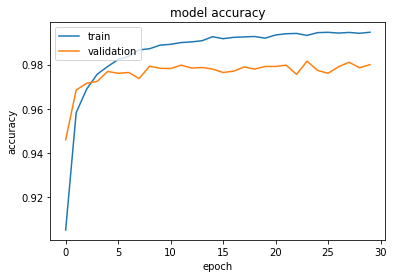

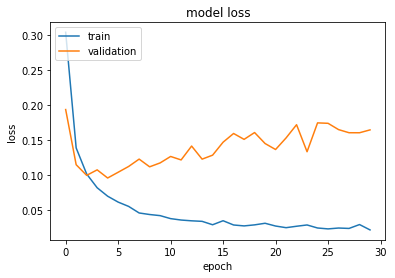

In [53]:
plot_accuracy(history)
plot_loss(history)

# Testing

In [21]:
test_data = pd.read_csv('./data/test.csv')
test_x = prepare_x(test_data)
print ("Test X shape : " + str(test_x.shape))

Test X shape : (28000, 28, 28, 1)


In [22]:
def get_prediction(model, imgs):
    predictio
    

In [23]:
model1.predict(test_x)

array([[1.8215934e-24, 1.4827392e-21, 1.0000000e+00, ..., 4.0702725e-14,
        6.9843801e-22, 3.7487905e-24],
       [1.0000000e+00, 6.5800803e-18, 5.0355001e-14, ..., 1.0960027e-10,
        5.3576111e-19, 5.3207539e-16],
       [4.4823187e-13, 1.8640705e-12, 4.8639478e-11, ..., 1.0071868e-06,
        1.4528624e-07, 9.9999833e-01],
       ...,
       [5.7482836e-30, 1.5576005e-21, 1.8329232e-21, ..., 1.0436324e-19,
        6.9947703e-17, 2.9235268e-14],
       [6.9890171e-10, 8.1132136e-11, 3.5457703e-09, ..., 1.3133086e-05,
        1.5471693e-07, 9.9997103e-01],
       [3.6460930e-21, 2.3810493e-17, 1.0000000e+00, ..., 2.6410831e-12,
        1.8624235e-17, 1.1573664e-18]], dtype=float32)

In [24]:
pred_1 = model1.predict_classes(test_x)

In [35]:
pred_2 = model2.predict_classes(test_x)

In [26]:
pred_3 = model3.predict_classes(test_x)

In [27]:
# Visualize test Results

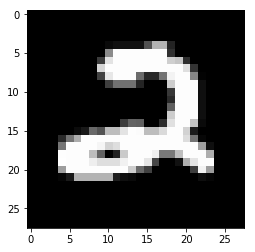

Preiction by model1: 2
Preiction by model2: 2
Preiction by model3: 2


In [28]:
i=0
showImage(test_x[i])
print("Preiction by model1: " + str(pred_1[i]))
print("Preiction by model2: " + str(pred_2[i]))
print("Preiction by model3: " + str(pred_3[i]))


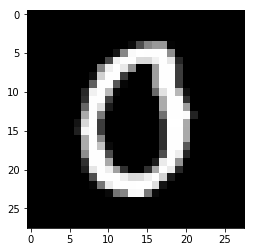

Preiction by model1: 0
Preiction by model2: 0
Preiction by model3: 0


In [29]:
i=100
showImage(test_x[i])
print("Preiction by model1: " + str(pred_1[i]))
print("Preiction by model2: " + str(pred_2[i]))
print("Preiction by model3: " + str(pred_3[i]))


# Submission to kaggle

In [36]:
result = pd.Series(pred_2, name = "Label")
submit = pd.concat([pd.Series(range(1, 28001), name = "ImageId"), result], axis = 1)
submit.to_csv("Submission.csv", index = False)

# Analysis

In [45]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

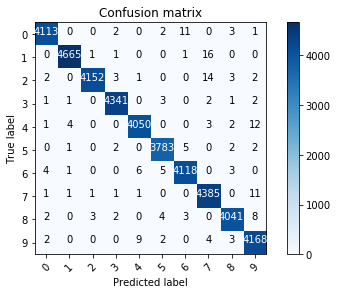

In [46]:
true = train_data.label
pred = model2.predict_classes(train_x)
confusion_mtx = confusion_matrix(true, pred) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 
